# BERT Homework

In [ ]:
!wget https://nlp.stanford.edu/projects/snli/snli_1.0.zip
!unzip snli_1.0.zip

In [ ]:
import torch
import torch.utils.data
import os
import torch
import random
import numpy as np

SEED = 124564

def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(SEED)

In [ ]:
import pandas as pd

df_train = pd.read_json('snli_1.0/snli_1.0_train.jsonl', lines=True)

df_train = df_train[['sentence1', 'sentence2', 'gold_label']]
df_train.rename(columns={'gold_label': 'label'}, inplace=True)
df_train.drop(df_train[df_train['label'] == '-'].index, inplace=True)

df_train = df_train.drop_duplicates().dropna().sample(frac=0.33).reset_index(drop=True)

df_train

,sentence1,sentence2,label
0,Two men are standing at telephone booths outside.,Some men are passing the time until their appo...,neutral
1,Two lone men in dark clothes stroll separately...,The two men are walking together.,contradiction
2,The benches are in a long row with the silver ...,The benches and tables are broken.,contradiction
3,A young boy is asleep at a table with his face...,A boy is at the dinner table.,entailment
4,paintball fight on the range,People are crying.,neutral
...,...,...,...
181106,Children play basketball on an outdoor court.,Children are outside,entailment
181107,An aspirin added to the water would preserve t...,This garden is lush and green.,contradiction
181108,"A woman in white jeans, and man in black short...",A rabbi performs a wedding.,contradiction
181109,An older man in a gray shirt carving a sculpture.,The older man is body painting.,contradiction


In [ ]:
df_dev = pd.read_json('snli_1.0/snli_1.0_dev.jsonl', lines=True)

df_dev = df_dev[['sentence1', 'sentence2', 'gold_label']]
df_dev.rename(columns={'gold_label': 'label'}, inplace=True)
df_dev.drop(df_dev[df_dev['label'] == '-'].index, inplace=True)

df_dev = df_dev.drop_duplicates().dropna().reset_index(drop=True)

df_dev

,sentence1,sentence2,label
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,neutral
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,entailment
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,contradiction
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,entailment
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,neutral
...,...,...,...
9835,A small girl wearing a pink jacket is riding o...,The carousel is moving.,entailment
9836,A small girl wearing a pink jacket is riding o...,The girl is moving at the speed of light.,contradiction
9837,A young girl with blue and pink ribbons in her...,People in a water fountain,entailment
9838,A young girl with blue and pink ribbons in her...,A young girl knits a sweater,contradiction


In [ ]:
df_test= pd.read_json('snli_1.0/snli_1.0_dev.jsonl', lines=True)

df_test = df_test[['sentence1', 'sentence2', 'gold_label']]
df_test.rename(columns={'gold_label': 'label'}, inplace=True)
df_test.drop(df_test[df_test['label'] == '-'].index, inplace=True)

df_test = df_test.drop_duplicates().dropna().reset_index(drop=True)

df_test

,sentence1,sentence2,label
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,neutral
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,entailment
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,contradiction
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,entailment
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,neutral
...,...,...,...
9835,A small girl wearing a pink jacket is riding o...,The carousel is moving.,entailment
9836,A small girl wearing a pink jacket is riding o...,The girl is moving at the speed of light.,contradiction
9837,A young girl with blue and pink ribbons in her...,People in a water fountain,entailment
9838,A young girl with blue and pink ribbons in her...,A young girl knits a sweater,contradiction


In [ ]:
from torch.utils.data import Dataset
from transformers import AutoTokenizer
import torch


class SNLIDataset(Dataset):
      # TODO: Code the Dataset class (init, len, get_item)


In [ ]:
from torch.utils.data import DataLoader

BERT =
MAXLEN =
BS =


train_dataset = SNLIDataset()
dev_dataset = SNLIDataset()
test_dataset = SNLIDataset()

train_loader = DataLoader(train_dataset, batch_size=BS)
dev_loader = DataLoader(dev_dataset, batch_size=BS)
test_loader = DataLoader(test_dataset, batch_size=BS)

In [ ]:
import torch.nn as nn
import copy
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score
from transformers import AutoModel


class EntailClassifier(nn.Module):

    # TODO: Define the init and forward methods



    def train_architecture(self, train_data, val_data, epochs, criterion, optimizer, scaler):

        train_losses = []
        val_losses = []
        accuracies = []
        best_valloss = np.Inf
        best_ep = 0
        best_model = copy.deepcopy(self.state_dict())

        for ep in tqdm(range(epochs)):
            self.train()
            ep_loss = 0.0

            for batch in tqdm(train_data, total=len(train_data)):
                optimizer.zero_grad()

                input_ids, attn_masks, labels = [b.to(self.device) for b in batch]

                with autocast():
                    logits = self(input_ids, attn_masks)
                    loss = criterion(logits.squeeze(-1), labels.float())

                ep_loss += loss.item()

                # Backpropagation
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()

            train_losses.append(ep_loss/len(train_data))

            # Evaluation

            val_loss, accuracy = self.eval_model(val_data, criterion)
            accuracies.append(accuracy)
            val_losses.append(val_loss)

            if val_loss < best_valloss:
                best_valloss = val_loss
                best_model = copy.deepcopy(self.state_dict())
                best_ep = ep+1

            print("Epoch END")

        torch.save(best_model, f"models/{self.model_name}.pth")

        return train_losses, accuracies, val_losses, best_ep, best_valloss


    def eval_model(self, val_data, criterion):
        self.eval()

        val_loss = 0.0
        val_preds = []
        val_labels = []

        with torch.no_grad():
            for batch in val_data:
                input_ids, attn_masks, labels = [b.to(self.device) for b in batch]

                with autocast():
                    logits = self(input_ids, attn_masks)
                    loss = criterion(logits.squeeze(-1), labels.float())
                    val_loss += loss.item()

                    val_preds.extend(logits.argmax(dim=-1).cpu().numpy())
                    val_labels.extend(labels.argmax(dim=-1).cpu().numpy())

        return val_loss/len(val_data), accuracy_score(val_labels, val_preds)


    def predict_data(self, test_data):
        self.eval()

        test_preds = []
        test_labels = []

        with torch.no_grad():
            for batch in tqdm(test_data, total=len(test_data)):
                input_ids, attn_masks, labels = [b.to(self.device) for b in batch]

                with autocast():
                    logits = self(input_ids, attn_masks)

                test_preds += logits.argmax(dim=-1).cpu().numpy().tolist()
                test_labels += labels.argmax(dim=-1).cpu().numpy().tolist()

        return test_preds, test_labels


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device loaded: {device}")

# TODO: Define the parameters, the loss function and  the scaling function

criterion =
scaler =

Device loaded: cuda


In [ ]:
from torch.optim import AdamW
!mkdir -p models

# TODO: Create the model and define the optimizer

model =

optimizer =

print("Training the model...")
train_losses, accuracies, val_losses, best_ep, best_valloss = model.train_architecture(train_loader, dev_loader, epochs, criterion, optimizer, scaler)

print(f"\n\nBest model at epoch {best_ep} with val loss {round(best_valloss, 4)}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Training the model...


 20%|██        | 1/5 [03:16<13:05, 196.38s/it]

Epoch END


 40%|████      | 2/5 [06:33<09:51, 197.01s/it]

Epoch END


 60%|██████    | 3/5 [09:51<06:34, 197.23s/it]

Epoch END


 80%|████████  | 4/5 [13:08<03:17, 197.09s/it]

Epoch END


100%|██████████| 5/5 [16:30<00:00, 198.11s/it]

Epoch END




Best model at epoch 3 with val loss 0.2214


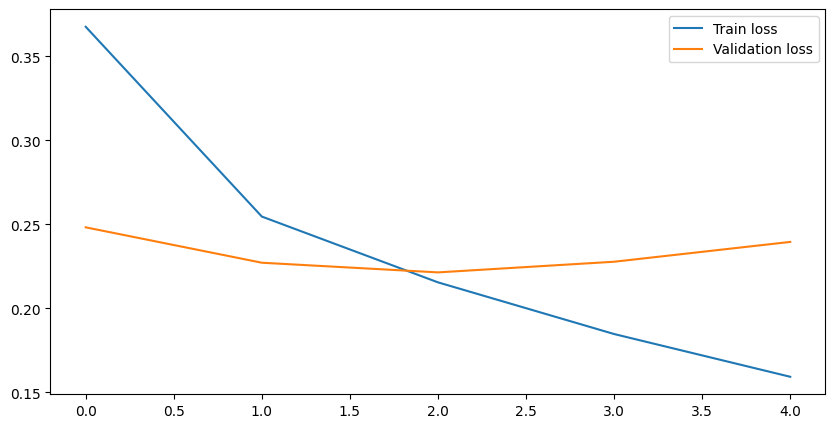

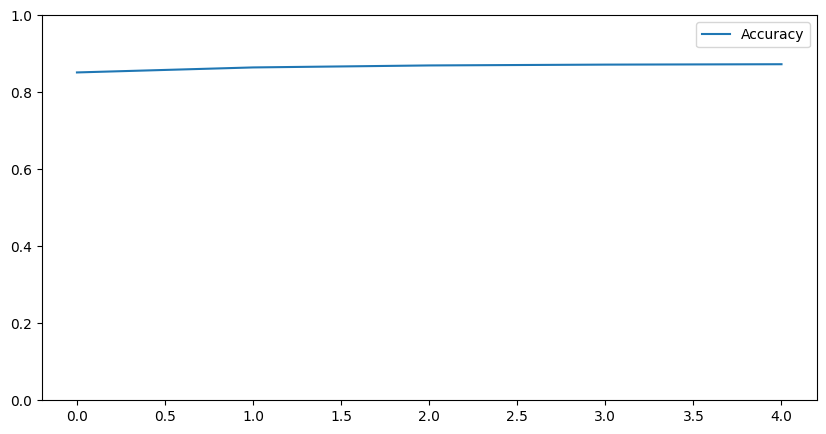

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(accuracies, label="Accuracy")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
model.load_state_dict(torch.load(f"models/{model.model_name}.pth"))
test_preds, test_labels = model.predict_data(test_loader)

from sklearn.metrics import classification_report

print(classification_report(test_labels, test_preds, zero_division=0, target_names=LABEL_MAP.keys()))

100%|██████████| 20/20 [00:05<00:00,  3.53it/s]

               precision    recall  f1-score   support

   entailment       0.92      0.86      0.89      3327
      neutral       0.80      0.88      0.84      3235
contradiction       0.90      0.87      0.89      3278

     accuracy                           0.87      9840
    macro avg       0.87      0.87      0.87      9840
 weighted avg       0.87      0.87      0.87      9840

